# How does alcohol abuse affect your brain?

## Problem description

We were tasked with examining EEG data to determine wether there is an effect of alcohol abuse on the observed brain waves.

The dataset we are working on arises from a large study to examine how EEG correlates to genetic predisposition to alcoholism. It contains measurements from 64 electrodes placed on subject's scalps which were sampled at 256 Hz (3.9-msec epoch) for 1 second.

There were two groups of subjects: alcoholic and control. Each subject was exposed to either a single stimulus (S1) or to two stimuli (S1 and S2) which were pictures of objects chosen from the 1980 Snodgrass and Vanderwart picture set. When two stimuli were shown, they were presented in either a matched condition where S1 was identical to S2 or in a non-matched condition where S1 differed from S2.

Electroencephalogram (EEG) is a test that is used to detect abnormalities in brain waves, or the electrical activity of the brain. During the procedure, electrodes consisting of small metal discs with thin wires are pasted onto the scalp. The electrodes detect tiny electrical charges that result from the activity of the brain cells. The charges are amplified and appear as a graph on a computer screen, or as a recording that may be printed out on paper. 

Usually the case is that a healthcare provider then interprets the reading. However, as modern technology grows, AI tools have started to take over.

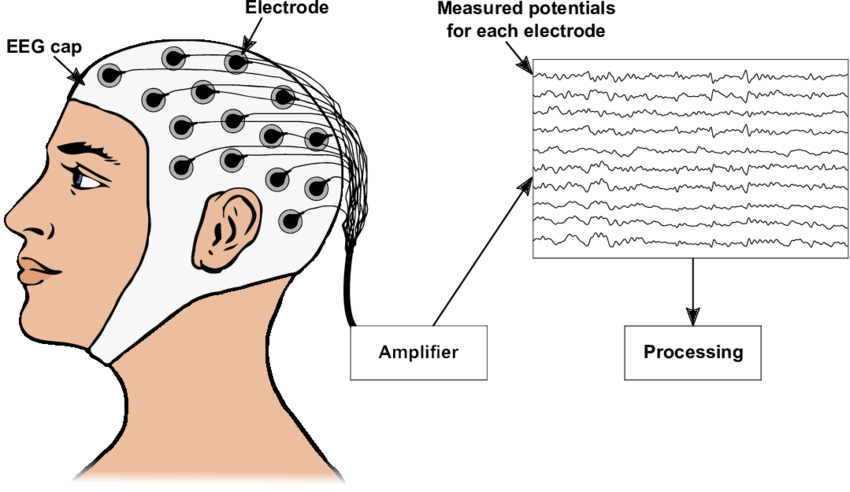

Data attribute information

Each trial is stored in its own file and will appear in the following format.

trial number sensor position sample num sensor value subject identifier matching condition channel name time

0 FP1 0 -8.921 a S1 obj 0 co2a0000364 0

0 AF8 87 4.14 a S1 obj 33 co2a0000364 0.33

The columns of data are:

the trial number,

sensor position,

sample number (0-255),

sensor value (in micro volts),

subject identifier(Alcoholic(a) or Control (c)),

matching condition(a single object shown (S1 obj), object 2 shown in a matching condition (S2 match), and object 2 shown in non matching condition (S2 nomatch)),

channel number(0-63),

name(a serial code assigned to each subject),

time(inverse of sample num measured in seconds))

Acknowledgements

There are no usage restrictions on this data.

Acknowledgments for this data should made to Henri Begleiter at the Neurodynamics Laboratory at the State University of New York Health Center at Brooklyn.

You can check out more info about it on: https://archive.ics.uci.edu/ml/datasets/eeg+database

References:
 - [1] Understanding alcohol use disorders with neuroelectrophysiology: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4331067/
 - [2]

## Data analysis

In [1]:
import pandas as pd

In [3]:
data = pd.read_csv('SMNI_CMI_TEST\Data1.csv')

In [4]:
data.head()

,Unnamed: 0,trial number,sensor position,sample num,sensor value,subject identifier,matching condition,channel,name,time
0,5,30,FP1,0,-3.550,a,S1 obj,0,co2a0000364,0.000000
1,6,30,FP1,1,-5.015,a,S1 obj,0,co2a0000364,0.003906
2,7,30,FP1,2,-5.503,a,S1 obj,0,co2a0000364,0.007812
3,8,30,FP1,3,-3.550,a,S1 obj,0,co2a0000364,0.011719
4,9,30,FP1,4,-0.621,a,S1 obj,0,co2a0000364,0.015625


In [6]:
data.describe()

,Unnamed: 0,trial number,sample num,sensor value,channel,time
count,16384.000000,16384.0,16384.000000,16384.000000,16384.000000,16384.000000
mean,8228.000000,30.0,127.500000,-0.008575,31.500000,0.498047
std,4748.269011,0.0,73.902526,6.754393,18.473517,0.288682
min,5.000000,30.0,0.000000,-48.330000,0.000000,0.000000
25%,4116.500000,30.0,63.750000,-4.059000,15.750000,0.249023
50%,8228.000000,30.0,127.500000,-0.285000,31.500000,0.498047
75%,12339.500000,30.0,191.250000,3.756500,47.250000,0.747070
max,16451.000000,30.0,255.000000,31.057000,63.000000,0.996094


In [36]:
data = data.rename(columns={"trial number": "trial_number", 
                          "sample num": "sample_num", 
                          "sensor value": "sensor_value",
                          "sensor position": "sensor_position",
                          "subject identifier": "subject_identifier",
                          "matching condition": "matching_condition"})

In [43]:
data

,Unnamed: 0,trial_number,sensor_position,sample_num,sensor_value,subject_identifier,matching_condition,channel,name,time
0,5,30,FP1,0,-3.550,a,S1 obj,0,co2a0000364,0.000000
1,6,30,FP1,1,-5.015,a,S1 obj,0,co2a0000364,0.003906
2,7,30,FP1,2,-5.503,a,S1 obj,0,co2a0000364,0.007812
3,8,30,FP1,3,-3.550,a,S1 obj,0,co2a0000364,0.011719
4,9,30,FP1,4,-0.621,a,S1 obj,0,co2a0000364,0.015625
...,...,...,...,...,...,...,...,...,...,...
16379,16447,30,Y,251,1.007,a,S1 obj,63,co2a0000364,0.980469
16380,16448,30,Y,252,3.937,a,S1 obj,63,co2a0000364,0.984375
16381,16449,30,Y,253,3.937,a,S1 obj,63,co2a0000364,0.988281
16382,16450,30,Y,254,2.472,a,S1 obj,63,co2a0000364,0.992188


In [50]:
data.channel.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63], dtype=int64)

In [51]:
assert len(data.channel.unique()) == 64

In [52]:
dict(data.channel.value_counts())

{0: 256,
 1: 256,
 34: 256,
 35: 256,
 36: 256,
 37: 256,
 38: 256,
 39: 256,
 40: 256,
 41: 256,
 42: 256,
 43: 256,
 44: 256,
 45: 256,
 46: 256,
 47: 256,
 48: 256,
 49: 256,
 50: 256,
 51: 256,
 52: 256,
 53: 256,
 54: 256,
 55: 256,
 56: 256,
 57: 256,
 58: 256,
 59: 256,
 60: 256,
 61: 256,
 62: 256,
 33: 256,
 32: 256,
 31: 256,
 15: 256,
 2: 256,
 3: 256,
 4: 256,
 5: 256,
 6: 256,
 7: 256,
 8: 256,
 9: 256,
 10: 256,
 11: 256,
 12: 256,
 13: 256,
 14: 256,
 16: 256,
 30: 256,
 17: 256,
 18: 256,
 19: 256,
 20: 256,
 21: 256,
 22: 256,
 23: 256,
 24: 256,
 25: 256,
 26: 256,
 27: 256,
 28: 256,
 29: 256,
 63: 256}

In [12]:
data.time.value_counts()

time
0.000000    64
0.003906    64
0.632812    64
0.636719    64
0.640625    64
            ..
0.351562    64
0.355469    64
0.359375    64
0.363281    64
0.996094    64
Name: count, Length: 256, dtype: int64

In [14]:
data.value_counts()

Unnamed: 0  trial number  sensor position  sample num  sensor value  subject identifier  matching condition  channel  name         time    
5           30            FP1              0           -3.550        a                   S1 obj              0        co2a0000364  0.000000    1
6           30            FP1              1           -5.015        a                   S1 obj              0        co2a0000364  0.003906    1
10961       30            C5               162         -6.653        a                   S1 obj              42       co2a0000364  0.632812    1
10962       30            C5               163         -4.700        a                   S1 obj              42       co2a0000364  0.636719    1
10963       30            C5               164         -2.747        a                   S1 obj              42       co2a0000364  0.640625    1
                                                                                                                                       

In [20]:
t_c_data = data[["time", "channel"]]
t_c_data

,time,channel
time,1.000000e+00,4.107863e-15
channel,4.107863e-15,1.000000e+00


In [ ]:
class Statistics:
    def __init__(self, file_path) -> None:
        data = pd.read_csv(file_path)
        data = data.rename(columns={"trial number": "trial_number", 
                                    "sample num": "sample_num", 
                                    "sensor value": "sensor_value",
                                    "sensor position": "sensor_position",
                                    "subject identifier": "subject_identifier",
                                    "matching condition": "matching_condition"})
        assert len(data.trial_number.unique()) == 1
        trial_number = data.trial_number.unique()[0]
        assert len(data.sample_num.unique()) == 256
        sensor_positions = data.sensor_position.unique()
        assert len(data.subject_identifier.unique()) == 1
        subject = data.subject_identifier.unique()[0]
        conditions = data.matching_condition.unique()
        assert len(data.channel.unique()) == 64
        
    def calculate_statistics(self):
        
    

## Final EDA

In [2]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
# Final EDA
p = Path(r'./SMNI_CMI_TRAIN').glob('**/*')
files = [x for x in p if x.is_file()]
data = dict()
for f in files:
    df = pd.read_csv(f)
    df = df.rename(columns={"trial number": "trial_number", 
                                "sample num": "sample_num", 
                                "sensor value": "sensor_value",
                                "sensor position": "sensor_position",
                                "subject identifier": "subject_identifier",
                                "matching condition": "matching_condition"})
    assert len(df.trial_number.unique()) == 1
    trial_number = int(df.trial_number.unique()[0])
    assert len(df.sample_num.unique()) == 256
    sensor_positions = df.sensor_position.unique()
    assert len(df.subject_identifier.unique()) == 1
    subject = df.subject_identifier.unique()[0]
    conditions = df.matching_condition.unique()
    assert len(df.channel.unique()) == 64
    assert len(df.name.unique()) == 1
    name = df.name.unique()[0]
    matching_condition = list(df.matching_condition.unique())
    ts = df.pivot(index="sample_num", columns="sensor_position", values="sensor_value")
    data[f] = {
        "trial_number": trial_number,
        "name": name,
        "time_series": ts,
        "matching_condition": matching_condition,
        "subject_identifier": subject,
    }

 - around 1gb of ram - could be problematic, maybe iterators to not keep all in ram?
 - subject_identifier == class, if a its alcoholic, otherwise not

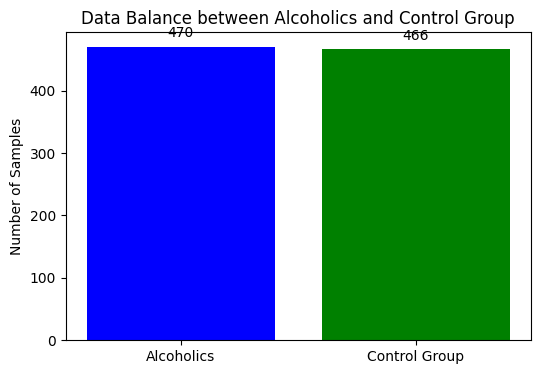

In [4]:
classes = [1 if d["subject_identifier"] == "a" else 0 for d in data.values()]
plt.figure(figsize=(6, 4))  # Optional: Adjust the figure size
class_counts = [sum(classes), len(classes) - sum(classes)]
bars = plt.bar(['Alcoholics', 'Control Group'], class_counts, color=['blue', 'green'])
plt.ylabel('Number of Samples')
plt.title('Data Balance between Alcoholics and Control Group')
for bar in bars:
    yval = bar.get_height()
    plt.annotate(f'{yval}',
                 (bar.get_x() + bar.get_width() / 2, yval),
                 textcoords="offset points",
                 xytext=(0,5),
                 ha='center',
                 va='bottom')
plt.show()

The data appears to be balanced

In [5]:
data.keys()

dict_keys([WindowsPath('SMNI_CMI_TRAIN/Data1.csv'), WindowsPath('SMNI_CMI_TRAIN/Data10.csv'), WindowsPath('SMNI_CMI_TRAIN/Data100.csv'), WindowsPath('SMNI_CMI_TRAIN/Data101.csv'), WindowsPath('SMNI_CMI_TRAIN/Data102.csv'), WindowsPath('SMNI_CMI_TRAIN/Data103.csv'), WindowsPath('SMNI_CMI_TRAIN/Data104.csv'), WindowsPath('SMNI_CMI_TRAIN/Data105.csv'), WindowsPath('SMNI_CMI_TRAIN/Data106.csv'), WindowsPath('SMNI_CMI_TRAIN/Data107.csv'), WindowsPath('SMNI_CMI_TRAIN/Data108.csv'), WindowsPath('SMNI_CMI_TRAIN/Data109.csv'), WindowsPath('SMNI_CMI_TRAIN/Data11.csv'), WindowsPath('SMNI_CMI_TRAIN/Data110.csv'), WindowsPath('SMNI_CMI_TRAIN/Data111.csv'), WindowsPath('SMNI_CMI_TRAIN/Data112.csv'), WindowsPath('SMNI_CMI_TRAIN/Data113.csv'), WindowsPath('SMNI_CMI_TRAIN/Data114.csv'), WindowsPath('SMNI_CMI_TRAIN/Data115.csv'), WindowsPath('SMNI_CMI_TRAIN/Data116.csv'), WindowsPath('SMNI_CMI_TRAIN/Data117.csv'), WindowsPath('SMNI_CMI_TRAIN/Data118.csv'), WindowsPath('SMNI_CMI_TRAIN/Data119.csv'), Wind

In [7]:
#DONT RUN THIS
from pandas_profiling import ProfileReport

first_key = next(iter(data.keys()))
profile = ProfileReport(data[first_key]["time_series"], tsmode=True, sortby="Date Local")
profile.to_file('profile_report.html')

PydanticImportError: `BaseSettings` has been moved to the `pydantic-settings` package. See https://docs.pydantic.dev/2.7/migration/#basesettings-has-moved-to-pydantic-settings for more details.

For further information visit https://errors.pydantic.dev/2.7/u/import-error

In [8]:
import numpy as np
from pathlib import WindowsPath

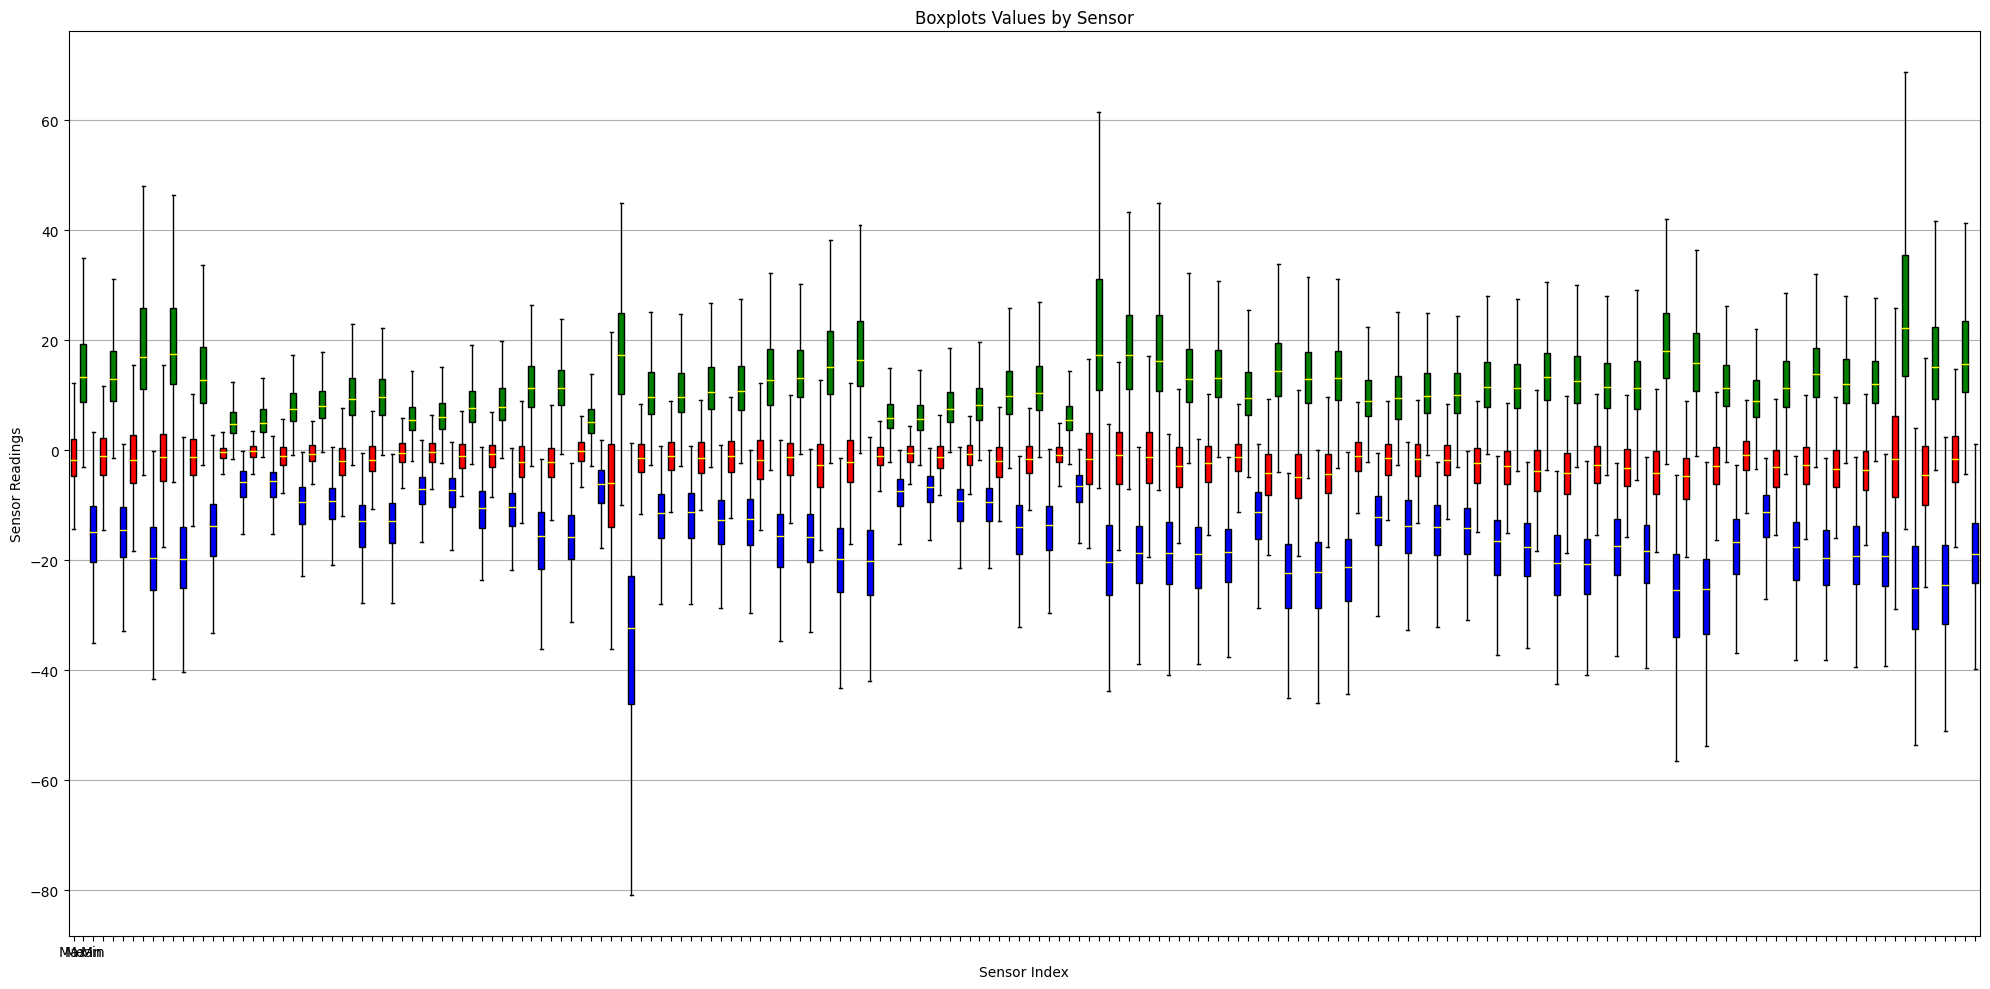

In [15]:
import matplotlib.pyplot as plt
import numpy as np

rows = len(data)
first_key = next(iter(data.keys()))
cols = data[first_key]["time_series"].shape[1]

stats = {stat: np.empty((rows, cols)) for stat in ["mean", "max", "min"]}

for i, (key, d) in enumerate(data.items()):
    ts = np.array(d["time_series"])
    stats["mean"][i], stats["max"][i], stats["min"][i] = ts.mean(axis=0), ts.max(axis=0), ts.min(axis=0)

colors = ['red', 'green', 'blue']
labels = ['Max', 'Mean', 'Min']

plt.figure(figsize=(20, 10))

for stat, color, label in zip(stats.values(), colors, labels):
    plt.boxplot(stat, positions=np.arange(1, cols+1) * len(stats) + colors.index(color), widths=0.6, patch_artist=True, boxprops=dict(facecolor=color), medianprops=dict(color='yellow'), showfliers=False, labels=[label if i == 0 else "" for i in range(cols)])

plt.title("Boxplots Values by Sensor")
plt.xlabel("Sensor Index")
plt.ylabel("Sensor Readings")
plt.grid(axis='y')
#plt.legend(labels)

plt.tight_layout()
plt.show()

In [10]:
from scipy.stats import pearsonr

In [11]:
corr = np.empty((cols, 3))  

for i_s, (stat_name, stat) in enumerate(stats.items()):
    for i_m, m in enumerate(stat.T):
        corr[i_m, i_s] = pearsonr(m, classes)[0]

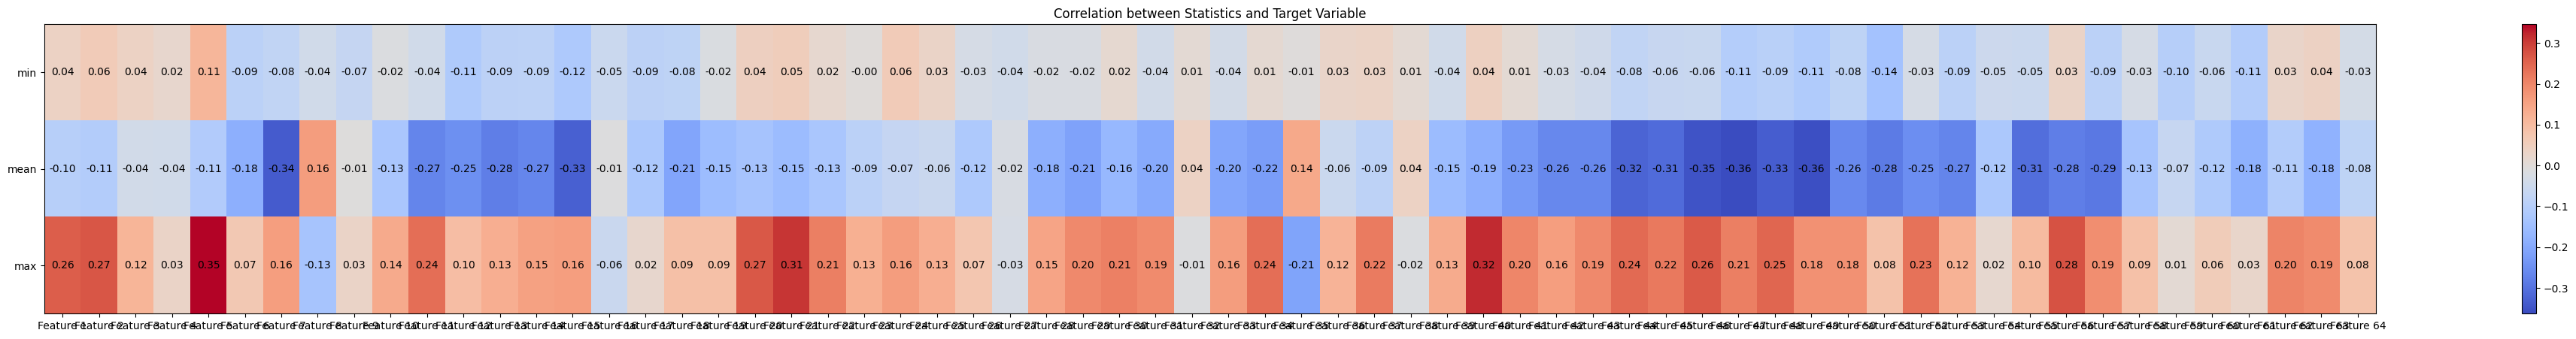

In [12]:
plt.figure(figsize=(50, 5))
plt.imshow(corr.T, cmap='coolwarm', aspect='auto')
plt.colorbar()
plt.xticks(range(corr.shape[0]), labels=[f"Feature {i+1}" for i in range(corr.shape[0])])  # Generalized label
plt.yticks(range(corr.shape[1]), labels=["min", "mean", "max"])
for x in range(corr.shape[0]):
    for y in range(corr.shape[1]):
        plt.text(x, y, f"{corr[x, y]:.2f}", ha="center", va="center", color="black")
plt.title("Correlation between Statistics and Target Variable")
plt.show()

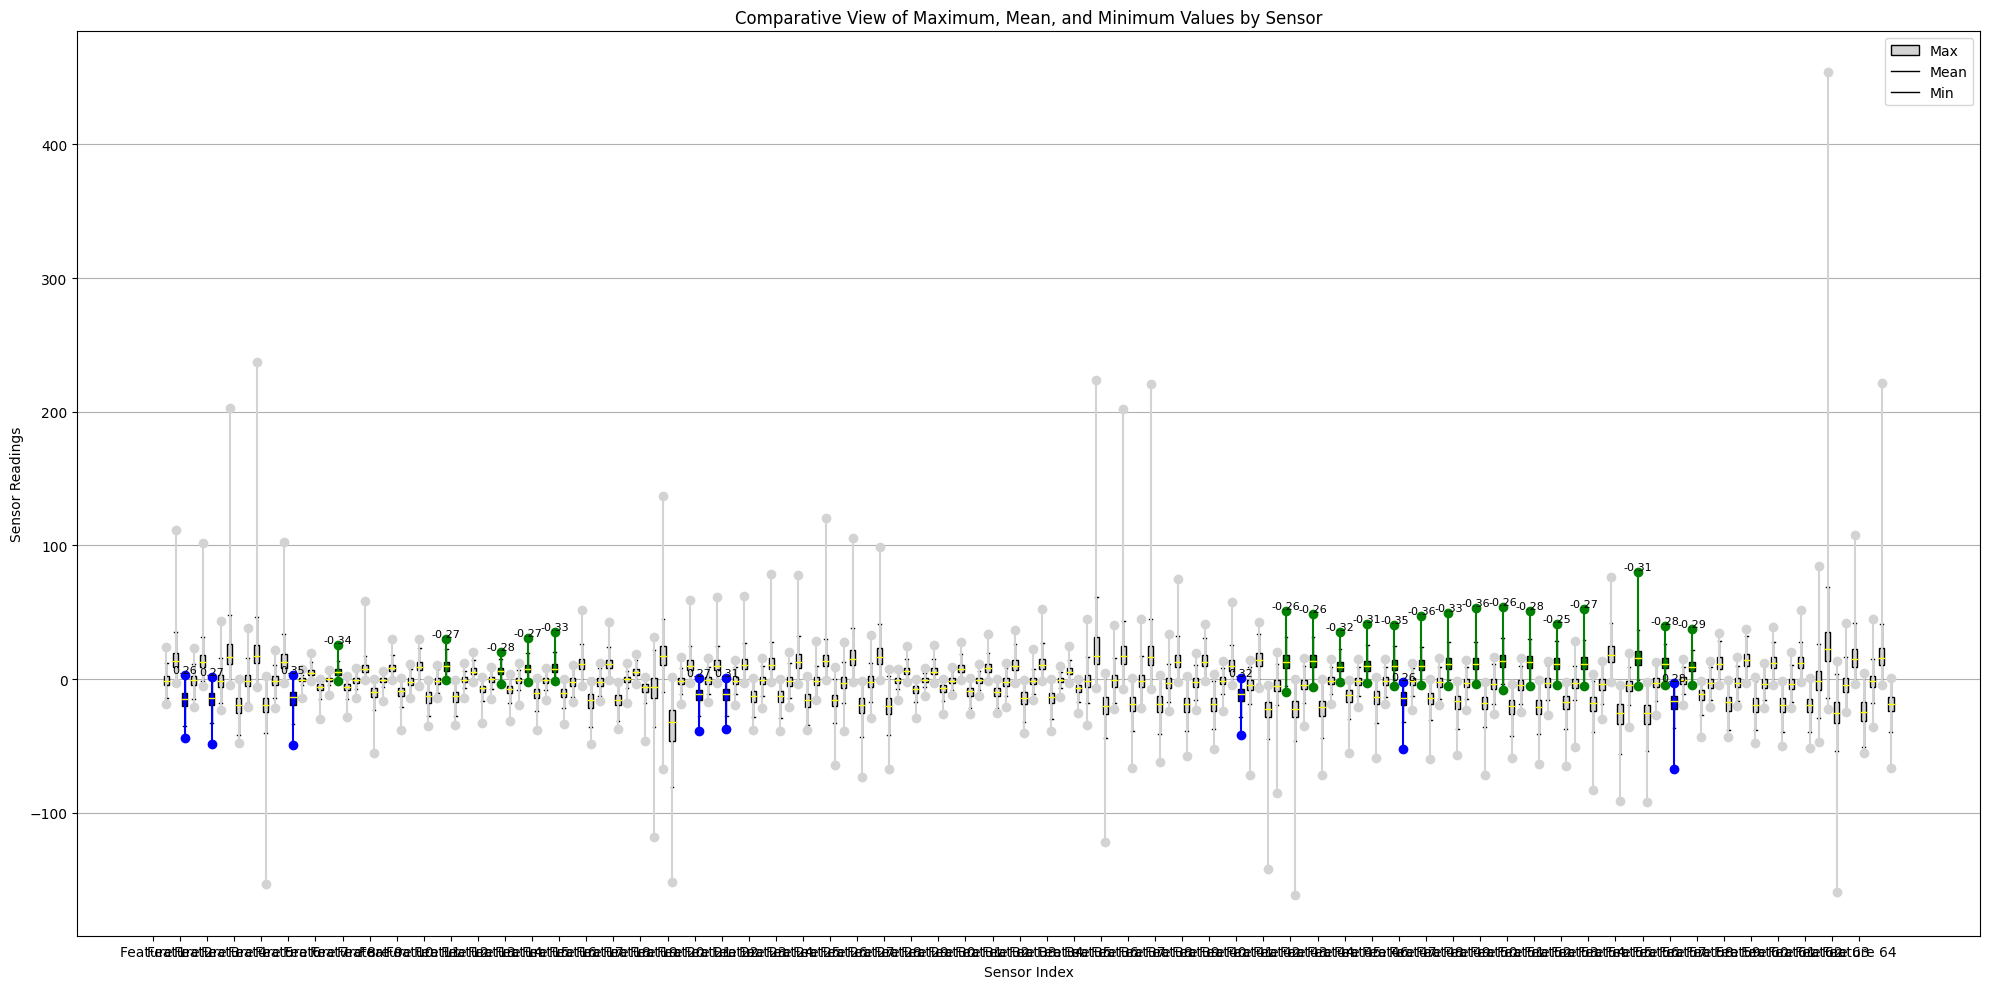

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

# Prepare data (assuming data structure is already defined and populated)
rows = len(data)
first_key = next(iter(data.keys()))
cols = data[first_key]["time_series"].shape[1]

stats = {stat: np.empty((rows, cols)) for stat in ["mean", "max", "min"]}

for i, (key, d) in enumerate(data.items()):
    ts = np.array(d["time_series"])
    stats["mean"][i], stats["max"][i], stats["min"][i] = ts.mean(axis=0), ts.max(axis=0), ts.min(axis=0)

# Colors for the different statistics
colors = ['red', 'green', 'blue']
labels = ['Max', 'Mean', 'Min']

# Calculate correlations
corr = np.empty((cols, 3))
for i_s, (stat_name, stat) in enumerate(stats.items()):
    for i_m, m in enumerate(stat.T):
        corr[i_m, i_s] = pearsonr(m, classes)[0]

plt.figure(figsize=(20, 10))

# Plotting all statistics on one plot with annotations for significant correlations
for index, (stat, label) in enumerate(zip(stats.values(), labels)):
    positions = np.arange(1, cols + 1) * len(stats) + index
    for i_p, pos in enumerate(positions):
        # Check correlation threshold
        significant = abs(corr[i_p, index]) > 0.25
        color = colors[index] if significant else 'lightgrey'

        # Plot boxplot
        bp = plt.boxplot(stat[:, i_p], positions=[pos], widths=0.6, patch_artist=True,
                         boxprops=dict(facecolor=color), medianprops=dict(color='yellow'),
                         showfliers=False, manage_ticks=False)

        # Adding min/max data points
        min_val = np.min(stat[:, i_p])
        max_val = np.max(stat[:, i_p])
        plt.plot([pos, pos], [min_val, max_val], color=color, marker='o', linestyle='-')  # Line for min and max

        # Annotate significant correlations
        if significant:
            plt.text(pos, max_val, f"{corr[i_p, index]:.2f}", ha='center', va='bottom', fontsize=8, color='black')

plt.title("Comparative View of Maximum, Mean, and Minimum Values by Sensor")
plt.xlabel("Sensor Index")
plt.ylabel("Sensor Readings")
plt.xticks(np.arange(1.5, cols * 3, 3), [f"Feature {i+1}" for i in range(cols)])  # Adjust x-ticks to group by feature
plt.legend(labels)
plt.grid(axis='y')

plt.tight_layout()
plt.show()


Maxs are highly correlated, means usually don't hold much value, mins are somehow correlated but not much

In [30]:
X.shape

(936, 192)

In [29]:
y.shape

(936,)

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

X = np.hstack((stats["min"], stats["mean"], stats["max"]))
y = np.array(classes)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=148260)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

accuracy = model.score(X_test, y_test)
predicted = model.predict(X_test)
f1 = f1_score(y_test, predicted)
print(f"Model Accuracy: {accuracy:.6f}")
print(f"F1 Score: {f1:.6f}")

#high value of accuracy - not much actual value, as this is done only on train data and doesn't utilize the sequential properties.

Model Accuracy: 0.980583
F1 Score: 0.981707


In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

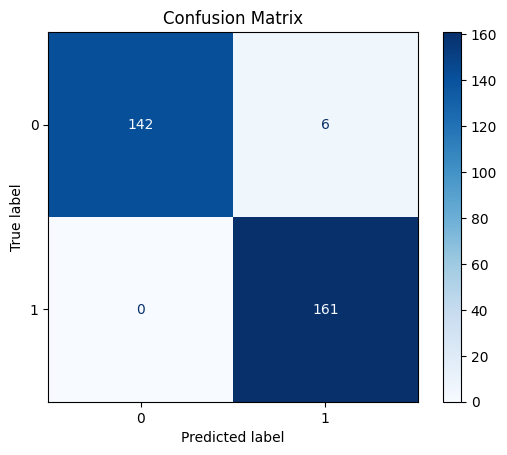

In [26]:
cm = confusion_matrix(y_test, predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

- more statistics (std, etc, other for time_series)
- LSTM, other reccurent nn
- feature engineering / data augmentation